In [66]:
#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [67]:
#read calendar, listings, and reviews data files
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# Exploring and cleaning datasets

## 1. Calender dataset:

In [68]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [69]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [70]:
#change listing_id and price data type
calendar['listing_id'] = calendar['listing_id'].astype(str)
calendar['price'] = calendar['price'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)

#extract year and month from date column
calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['month'] = pd.DatetimeIndex(calendar['date']).month

In [71]:
calendar.dtypes

listing_id     object
date           object
available      object
price         float64
year            int64
month           int64
dtype: object

In [72]:
calendar.head()

,listing_id,date,available,price,year,month
0,241032,2016-01-04,t,85.0,2016,1
1,241032,2016-01-05,t,85.0,2016,1
2,241032,2016-01-06,f,NaN,2016,1
3,241032,2016-01-07,f,NaN,2016,1
4,241032,2016-01-08,f,NaN,2016,1


In [73]:
calendar.describe()

,price,year,month
count,934542.000000,1.393570e+06,1.393570e+06
mean,137.944859,2.016005e+03,6.528767e+00
std,105.062870,7.382027e-02,3.443855e+00
min,10.000000,2.016000e+03,1.000000e+00
25%,75.000000,2.016000e+03,4.000000e+00
50%,109.000000,2.016000e+03,7.000000e+00
75%,160.000000,2.016000e+03,1.000000e+01
max,1650.000000,2.017000e+03,1.200000e+01


In [74]:
#Add neighbouhood group name from listings dataset

#rename id column
listings = listings.rename(index=str, columns={"id": "listing_id"})
listings['listing_id'] = listings['listing_id'].apply(str)

#add neighbourhood_group_cleansed column to calandar dataset
listings_neighbourhood = listings[['listing_id', 'neighbourhood_group_cleansed']]
calandar_w_neighbourhood = pd.merge(calendar, listings_neighbourhood, on = 'listing_id')

calandar_w_neighbourhood.head()

,listing_id,date,available,price,year,month,neighbourhood_group_cleansed
0,241032,2016-01-04,t,85.0,2016,1,Queen Anne
1,241032,2016-01-05,t,85.0,2016,1,Queen Anne
2,241032,2016-01-06,f,NaN,2016,1,Queen Anne
3,241032,2016-01-07,f,NaN,2016,1,Queen Anne
4,241032,2016-01-08,f,NaN,2016,1,Queen Anne


1. Dataset min date: 2016-01-04 , max date: 2017-01-02

2. The proportion of missing values in the price column: 0.33

3. Average price per neighbourhood/month:


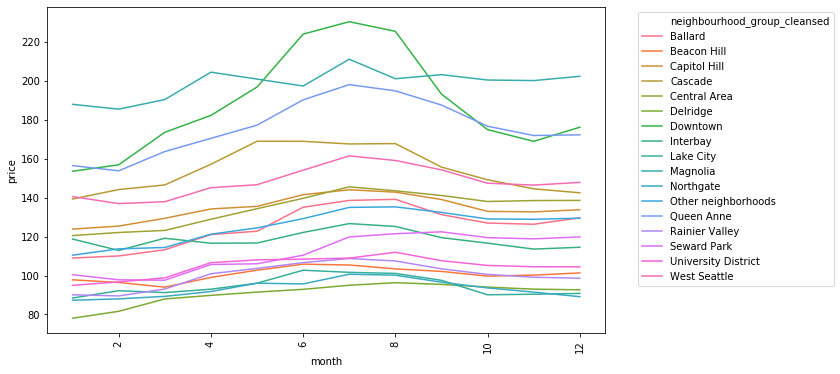


4. Price distribution:


Text(0.5, 1.0, 'Price distribution')

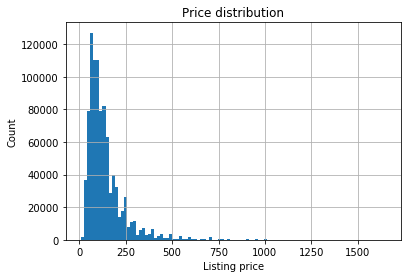

In [75]:
#Expoloring calendar data

print('1. Dataset min date:', calendar['date'].min(), ', max date:', calendar['date'].max())

print('\n2. The proportion of missing values in the price column:', calendar['price'].isnull().mean().round(2))

print('\n3. Average price per neighbourhood/month:')
average_price_per_month = calandar_w_neighbourhood.groupby(['month', 'neighbourhood_group_cleansed']).agg({'price': np.mean}).reset_index()

#plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='price', data=average_price_per_month, hue='neighbourhood_group_cleansed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

print('\n4. Price distribution:')
calendar['price'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('Listing price')
plt.title('Price distribution')

## 2.Listings dataset:

In [76]:
listings.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [77]:
listings.describe()

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [78]:
listings.dtypes

listing_id                           object
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [79]:
#change review_scores_value, monthly and weekly prices, bedrooms, bathrooms, and listing id data type
listings['review_scores_rating'] = listings['review_scores_rating'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
listings['price'] = listings['price'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
listings['bedrooms'] = listings['bedrooms'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
listings['bathrooms'] = listings['bathrooms'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
listings['listing_id'] = listings['listing_id'].astype(str)

#replace null property_type with "N/A"
listings.property_type.unique()
listings.property_type.fillna('N/A', inplace=True)

#replace null review_scores_value with mean
listings.review_scores_value.unique()
listings['review_scores_value'].fillna(listings['review_scores_value'].mean(), inplace=True)

In [80]:
#Expoloring listings data

print('1. Column names and persentage of the null count:', listings[listings.columns[listings.isnull().any()]].isnull().sum() 
      * 100 / listings.shape[0])

1. Column names and persentage of the null count: summary                          4.635935
space                           14.903091
neighborhood_overview           27.029859
notes                           42.063908
transit                         24.463070
thumbnail_url                    8.381351
medium_url                       8.381351
xl_picture_url                   8.381351
host_name                        0.052383
host_since                       0.052383
host_location                    0.209534
host_about                      22.498690
host_response_time              13.698271
host_response_rate              13.698271
host_acceptance_rate            20.246202
host_is_superhost                0.052383
host_thumbnail_url               0.052383
host_picture_url                 0.052383
host_neighbourhood               7.857517
host_listings_count              0.052383
host_total_listings_count        0.052383
host_has_profile_pic             0.052383
host_identity_verified    

In [81]:
print('\n2. Distribution of listings score values per porperty type in Seattle:')
fig = px.scatter_mapbox(listings, lat="latitude", lon="longitude", color="property_type", size = 'review_scores_value', zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.show()


2. Distribution of listings score values per porperty type in Seattle:



3. Check bedrooms, bathrooms, host listings count, availability, number of reviews, review score value, and price correlation


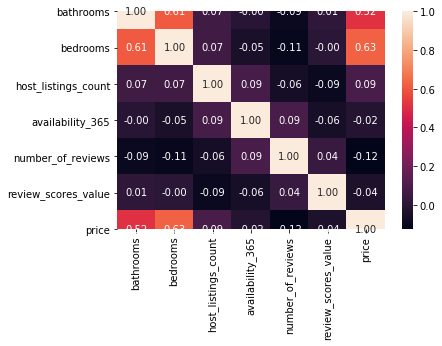

In [82]:
print('\n3. Check bedrooms, bathrooms, host listings count, availability, number of reviews, review score value, and price correlation')
cols = ['bathrooms', 'bedrooms', 'host_listings_count', 'availability_365', 'number_of_reviews', 'review_scores_value', 'price']
sns.heatmap(listings[cols].corr(), annot=True, fmt = '.2f')

## 3. reviews dataset:

In [83]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [84]:
#change listing_id data type
reviews['listing_id'] = reviews['listing_id'].astype(str)

#extract year and month from date column
reviews['year'] = pd.DatetimeIndex(reviews['date']).year
reviews['month'] = pd.DatetimeIndex(reviews['date']).month

In [85]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,2015,7
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,2015,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",2015,7
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,2015,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,2015,8


In [86]:
#search for positive and negative keywords and create counts columns
reviews['great'] = reviews["comments"].str.contains("great", case=False, na=False).astype(int)
reviews['awesome'] = reviews["comments"].str.contains("awesome", case=False, na=False).astype(int)
reviews['love'] = reviews["comments"].str.contains("love", case=False, na=False).astype(int)
reviews['fantastic'] = reviews["comments"].str.contains("fantastic", case=False, na=False).astype(int)
reviews['amazing'] = reviews["comments"].str.contains("amazing", case=False, na=False).astype(int)
reviews['wow'] = reviews["comments"].str.contains("wow", case=False, na=False).astype(int)
reviews['like'] = reviews["comments"].str.contains("like", case=False, na=False).astype(int)
reviews['hate'] = reviews["comments"].str.contains("hate", case=False, na=False).astype(int)
reviews['horrible'] = reviews["comments"].str.contains("horrible", case=False, na=False).astype(int)
reviews['bad'] = reviews["comments"].str.contains("bad", case=False, na=False).astype(int)
reviews['terrible'] = reviews["comments"].str.contains("terrible", case=False, na=False).astype(int)
reviews['awful'] = reviews["comments"].str.contains("awful", case=False, na=False).astype(int)
reviews['issue'] = reviews["comments"].str.contains("issue", case=False, na=False).astype(int)
reviews['noise'] = reviews["comments"].str.contains("noise", case=False, na=False).astype(int)
reviews['damage'] = reviews["comments"].str.contains("damage", case=False, na=False).astype(int)

In [87]:
reviews.describe()

,id,reviewer_id,year,month,great,awesome,love,fantastic,amazing,wow,like,hate,horrible,bad,terrible,awful,issue,noise,damage
count,8.484900e+04,8.484900e+04,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.00000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000,84849.000000
mean,3.058765e+07,1.701301e+07,2014.409575,7.454419,0.504249,0.057561,0.203279,0.057490,0.076383,0.00350,0.118670,0.003076,0.000401,0.007967,0.000577,0.000377,0.024161,0.021745,0.000342
std,1.636613e+07,1.353704e+07,0.935417,2.828069,0.499985,0.232913,0.402441,0.232779,0.265611,0.05906,0.323401,0.055377,0.020014,0.088903,0.024024,0.019417,0.153548,0.145849,0.018484
min,3.721000e+03,1.500000e+01,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.725127e+07,5.053141e+06,2014.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.228809e+07,1.413476e+07,2015.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.457648e+07,2.762402e+07,2015.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.873651e+07,5.281274e+07,2016.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
#Create positive and negative columns
reviews.loc[(reviews['great'] == 1) | (reviews['awesome'] == 1) | (reviews['love'] == 1) | (reviews['fantastic'] == 1) | 
(reviews['amazing'] == 1) | (reviews['wow'] == 1) | (reviews['like'] == 1), 'positive'] = 1

reviews.loc[(reviews['hate'] == 1) | (reviews['horrible'] == 1) | (reviews['bad'] == 1) | (reviews['terrible'] == 1) | 
       (reviews['awful'] == 1) | (reviews['issue'] == 1) | (reviews['noise'] == 1) | (reviews['damage'] == 1), 'negative'] = 1

#change positive and negative column types to float
reviews['positive'] = reviews['positive'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)
reviews['negative'] = reviews['negative'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)

In [89]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,great,awesome,...,hate,horrible,bad,terrible,awful,issue,noise,damage,positive,negative
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,2015,7,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,2015,7,1,0,...,0,0,0,0,0,0,0,0,1.0,NaN
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",2015,7,1,0,...,0,0,0,0,0,1,0,0,1.0,1.0
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,2015,8,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,2015,8,1,0,...,0,0,0,0,0,0,0,0,1.0,NaN


In [90]:
#add neighbourhood_group_cleansed column to reviews dataset
listings_neighbourhood = listings[['listing_id', 'neighbourhood_group_cleansed']]
reviews_w_neighbourhood = pd.merge(reviews, listings_neighbourhood, on = 'listing_id')

reviews_w_neighbourhood.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,great,awesome,...,horrible,bad,terrible,awful,issue,noise,damage,positive,negative,neighbourhood_group_cleansed
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,2015,7,0,0,...,0,0,0,0,0,0,0,NaN,NaN,Queen Anne
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,2015,7,1,0,...,0,0,0,0,0,0,0,1.0,NaN,Queen Anne
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",2015,7,1,0,...,0,0,0,0,1,0,0,1.0,1.0,Queen Anne
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,2015,8,0,0,...,0,0,0,0,0,0,0,NaN,NaN,Queen Anne
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,2015,8,1,0,...,0,0,0,0,0,0,0,1.0,NaN,Queen Anne


1. Positive and negative reviews per month:


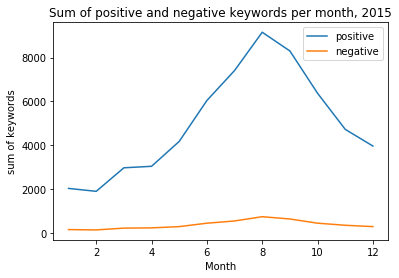

In [91]:
#Expoloring reviews data

print('1. Positive and negative reviews per month:')
reviews_per_month = reviews.groupby(['month'])['positive','negative'].sum()
#plot
plt.plot(reviews_per_month)
plt.ylabel('sum of keywords')
plt.xlabel('Month')
plt.title('Sum of positive and negative keywords per month, 2015')
plt.gca().legend(('positive','negative'))
plt.show()

In [92]:
print('\n2. Top 10 positive reviews listings in Seattle:')
reviews_per_listing = reviews_w_neighbourhood.groupby(['neighbourhood_group_cleansed'])['positive','negative'].sum()
reviews_per_listing.sort_values(by=['positive'], ascending = False).head(10)


2. Top 10 positive reviews listings in Seattle:


,positive,negative
neighbourhood_group_cleansed,,
Other neighborhoods,12218.0,842.0
Downtown,9195.0,1063.0
Capitol Hill,9127.0,694.0
Central Area,5951.0,381.0
Ballard,5111.0,259.0
Queen Anne,4927.0,303.0
Rainier Valley,2713.0,157.0
West Seattle,2370.0,132.0
Beacon Hill,2130.0,172.0


In [93]:
print('\n3. The correlation between the review type (positive/negative) and the neighbourhood group listings in Seattle:')

#create a summary table (neighbourhood, sum of positive comments, sum of negative comments, count of comments per neighbourhood)
reviews_per_neighbourhood = reviews_w_neighbourhood.groupby(['neighbourhood_group_cleansed']).agg({'positive': sum, 
                                                                                                                  'negative': sum,
                                                                                                                  'comments': ['count']}).reset_index()

#cleaning reviews_per_neighbourhood table and calculate positive, negative, unanlyzed comments ratios
reviews_per_neighbourhood_1 = reviews_per_neighbourhood.sort_values(by=('comments', 'count'), ascending = False).reset_index()
reviews_per_neighbourhood_2 = reviews_per_neighbourhood_1.drop('index', 1)
reviews_per_neighbourhood_3 = reviews_per_neighbourhood_2.set_axis(['neighbourhood_group_cleansed', 'positive review', 'negative review', 'total comments'], axis=1, inplace=False)

reviews_per_neighbourhood_3['positive comments ratio'] = reviews_per_neighbourhood_3['positive review']/reviews_per_neighbourhood_3['total comments']
reviews_per_neighbourhood_3['negative comments ratio'] = reviews_per_neighbourhood_3['negative review']/reviews_per_neighbourhood_3['total comments']
reviews_per_neighbourhood_3['unanalyzed comments ratio'] = 1 - (reviews_per_neighbourhood_3['positive comments ratio']+reviews_per_neighbourhood_3['negative comments ratio'])
reviews_per_neighbourhood_4 = reviews_per_neighbourhood_3.drop(['positive review','negative review', 'total comments'], 1)
reviews_per_neighbourhood_5 = reviews_per_neighbourhood_4.melt(id_vars=['neighbourhood_group_cleansed'])

fig = px.bar(reviews_per_neighbourhood_5, x="neighbourhood_group_cleansed", y="value", color='variable', 
             title="Positive/negative comments ratio per neighbourhood", labels={'value':'listings comments ratio'})
fig.show()


3. The correlation between the review type (positive/negative) and the neighbourhood group listings in Seattle:


# Analysis

### 1- What are the main factors that effect Airbnb listing prices?



There is a positive correlation between listing's price and number of bedrooms and bathrooms

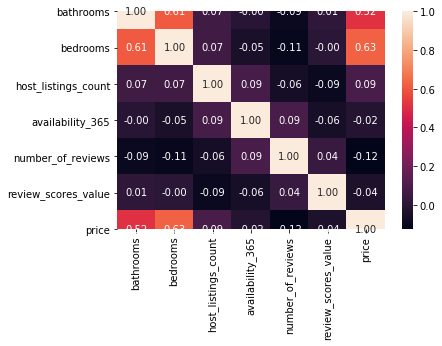

In [94]:
cols = ['bathrooms', 'bedrooms', 'host_listings_count', 'availability_365', 'number_of_reviews', 'review_scores_value', 'price']
sns.heatmap(listings[cols].corr(), annot=True, fmt = '.2f')

### 2- What are the price peaks in 2016, any outlier neighborhoods?

The magority of neighbourhoods have it's highest average listings prices at Seattle in summer months: June, July, and August. The most affected neighbourhood group is downtown's Seattle, prices increased ~30% in summer months. 

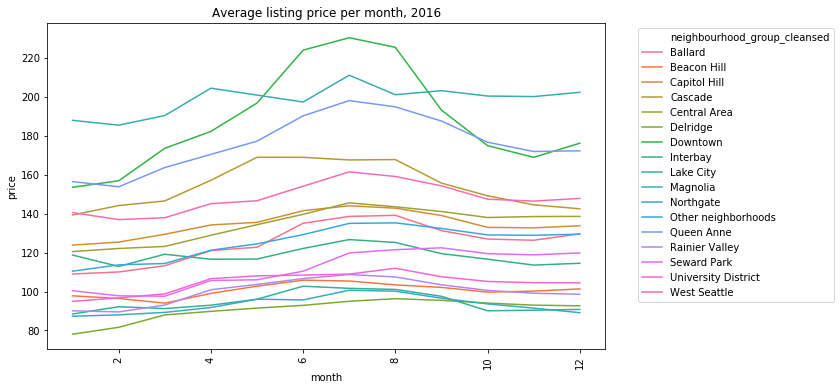

In [95]:
average_price_per_month = calandar_w_neighbourhood.groupby(['month', 'neighbourhood_group_cleansed']).agg({'price': np.mean}).reset_index()

#plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='price', data=average_price_per_month, hue='neighbourhood_group_cleansed')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Average listing price per month, 2016')
plt.xticks(rotation=90)
plt.show()

### 3- Is there a correlation betwwen the review type (positive/negative) and the neighbourhood group?

- University district has the highest negative comments ratio compared to other neighbourhoods. Staying at University district seems unfavorable to Seattle's visitors.
- Downtown and Cascade neighbourhoods have high positive and negative comments ratios compared to other neighbourhoods.


In [96]:
fig = px.bar(reviews_per_neighbourhood_5, x="neighbourhood_group_cleansed", y="value", color='variable', 
             title="Positive/negative comments ratio per neighbourhood", labels={'value':'listings comments ratio'})
fig.show()